## Clustering

In Machine Learning, unsupervised learning is a class of problems in which one seeks to determine how the data are organized. It is different from supervised learning and reinforcement learning in that learner is given only unlabeled examples.
< to change>

Clustering is a method of unsupervised learning for performing statistical analysis used in many fields.
Clustering is about dividing the data set into sub sets, or clusters, wherein the observations should be similar to those in the same cluster but differ greatly from the observations in other clusters. 

## Two common algorithms:
### 1. Hierarchical clustering
### 2. K-mean clustering

## 1. K-means clustering
K-means clustering is an algorithm to group your objects based on attributes into k number of groups and k > 0.
Grouping is done by minimizing the sum of squares of distances between data and the corresponding cluster centroid. 



## 2. Hierarchical clustering
Hierarchical  (aka agglomerative) clustering tries to link each data point by a distance measure, to its nearest neighbour, creating a cluster. Reiterating the algorithm using different linkage methods, the algorithm gathers all the available points into a rapidly diminishing number of clusters, until in the end all the points reunite into a single group.


## Linkage methods


### 1. Ward
This looks for spherical clusters, very cohesive inside and extremely differentiated from other groups. 
This finds clusters of similar size and works well with Euclidean distance.

### 2. Complete
This looks for most dissimilar data points and links clusters. Clusters created using this method comprises highly similar observations, making the clusters compact.

### 3. Average
This looks for centroids of data points, ignoring their boundaries and links clusters. 
These clusters are can be of different sizes and shapes making it attractive technique to be used in the field of biological sciences.

## Three distance metrics

### 1) Euclidean distance or l2

The Euclidean distance between points a and b is the length of the line segment connecting them .
$d_{Euc}{(a,b)}$ = $\sqrt{(\sum(a_i - b_i)}^2$

### 2) Manhattan or l1

The Manhattan distance between points is calculate by adding the absolute value of the difference between the dimensions.

$d_{Manhattan}{(a,b)}$ = ${\sum{|(a_i - b_i)|}}$

### 3) Cosine

Cosine distance is squared Euclidean distance with the data normalized to unit length.


In hierarchical clustering, we don't use a set number of clusters but rather we arrange the data in a hierarchy where on top of the hierarchy there is a single big cluster and at the bottom of the hierarchy we have as many clusters as many observations in the data set.

## Two common methods of hierarchical clustering algorithms:

### Agglomerative Hierarchical Clustering Algorithms

In this approach, we initially assign different clusters to each observation. Based on similarity we consolidate until we arrive at one single big cluster.

### Divisive Hierarchical Clustering Algorithm

In this approach, we initially assign a single cluster to  all the observations.The clusters are divided continuously until we have one cluster for each observation.

We will use Agglomerative Clustering method. 

We shall use a Dendrogram to decide the number of clusters required for the dataset.
A *Dendrogram* is a tree diagram illustrating the arrangement of clusters.

We will import the package AgglomerativeClustering for building an agglomerative clustering model. We shall import other required packages like pandas, matplotlib, numpy etc.
We shall import datasets for obtaining the iris dataset.
We shall import the package dendrogram which allows us to create dendrogram.

In [78]:
import pandas                  as     pd
import numpy                   as     np
from   sklearn.cluster         import AgglomerativeClustering, KMeans
import sklearn.datasets
from   scipy.cluster.hierarchy import dendrogram, linkage
from   matplotlib              import pyplot as plt
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

Load the iris data 

In [12]:
data     =  sklearn.datasets.load_iris()
x        =  pd.DataFrame(data.data, columns = list(data.feature_names))

Plot a dendrogram to help us in deciding the threshold values for the clustering algorithm. 
We decide the number of clusters by using this dendrogram.

Text(0,0.5,'Euclidean distance in the space with other variables')

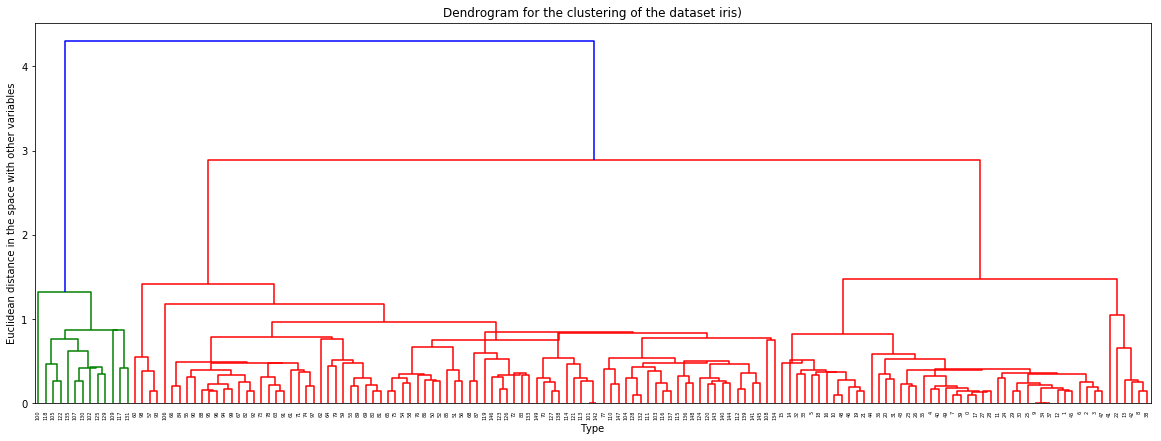

In [15]:
z   = linkage(x, method = 'median')

plt.figure(figsize=(20,7))

den = dendrogram(z)

plt.title('Dendrogram for the clustering of the dataset iris)')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')

## Based on the dissimilarity of the clusters, we arrive at three clusters. 

### Building an Agglomerative Clustering Model

#### 1. Initialize the model with number of clusters = 3, affinity = 'cosine' and linkage = 'complete'

In [25]:
cluster_H = AgglomerativeClustering(n_clusters = 3, affinity = 'cosine', linkage = 'complete')

#### 2. Fitting the model

After building the model, fit the iris data set by taking only independent variables.

In [26]:
model = cluster_H.fit(x)
print(model)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=3,
            pooling_func=<function mean at 0x0000021626981158>)


Retrieve the predicted labels from model.labels_ and compare with the target labels by using the crosstab(), function.

In [27]:
ms          = np.column_stack((data.target,model.labels_))
df          = pd.DataFrame(ms, columns = ['Actual', 'Clusters'])
pd.crosstab(df['Actual'], df['Clusters'], margins=True)

Clusters,0,1,2,All
Actual,,,,
0,50,0,0,50
1,0,50,0,50
2,0,24,26,50
All,50,74,26,150


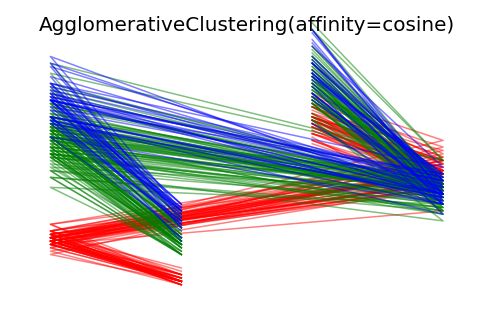

In [28]:
n_clusters = 3
plt.figure()
plt.axes([0, 0, 1, 1])
for l, c in zip(np.arange(n_clusters), 'rgbk'):
    plt.plot(x[model.labels_ == l].T, c=c, alpha=.5)
    plt.axis('tight')
    plt.axis('off')
    plt.suptitle("AgglomerativeClustering(affinity=%s)" % 'cosine', size=20)

In [106]:
df['Clusters']  = model.labels_.astype('int32')
df['Target']    = data.target.astype('int32')

In [107]:
pd.crosstab(df['Target'], df['Clusters'])

Clusters,0,1,2
Target,,,
0,50,0,0
1,0,50,0
2,0,24,26


In [108]:
iris_X  = x.values
iris_X  = np.array(iris_X)
iris_Y1 = df['Clusters']
iris_Y1 = np.array(iris_Y1)

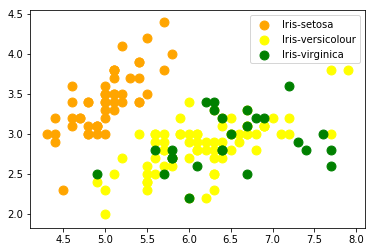

In [109]:
plt.scatter(iris_X[iris_Y1 == 0, 0], iris_X[iris_Y1 == 0, 1], s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[iris_Y1 == 1, 0], iris_X[iris_Y1 == 1, 1], s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[iris_Y1 == 2, 0], iris_X[iris_Y1 == 2, 1], s = 80, c = 'green', label = 'Iris-virginica')
plt.legend()

Here also we found that Iris-setosa has been clearly formed into separate cluster 
while the cluster, virginica overlap with Versicolor.

### K means

K-means is the most commonly used method for clustering.
It requires us to define the number of clusters. 


Decided the number of clusters, k
By performing Elbow analysis by running K-means for the value of k from 1 to 11, we find the optimum value of k.
for i in range(1, 11):

In [80]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Text(0,0.5,'WCSS')

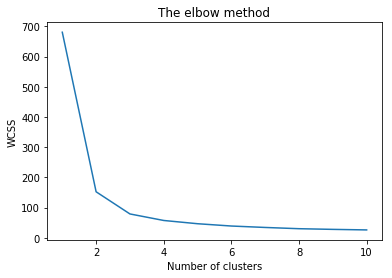

In [81]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Refer the above elbow graph. Observe the points where the drop falls and the line smoothens out. So k=3 because till k = 3, the decline is sharp. 

In [98]:
cluster_Kmeans = KMeans(n_clusters = 3, random_state = 25)
model_kmeans   = cluster_Kmeans.fit(x)
est_kmeans    = model_kmeans.labels_
est_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [99]:
df.drop(columns       = ['Clusters', 'Target'], inplace = True)
df['Clusters']        = est_kmeans
df['Target']          = data.target
pd.crosstab(df['Target'], df['Clusters'])

Clusters,0,1,2
Target,,,
0,50,0,0
1,0,48,2
2,0,14,36


The above table shows that we have classified 134 observations (50 + 48 + 36) out of 150 observations.

In [101]:
iris_X = x.values
iris_X = np.array(iris_X)
iris_Y = data.target
iris_Y = np.array(iris_Y)
iris_Y1 = pred_kmeans
iris_Y1 = np.array(iris_Y1)

### Visualize the clusters.

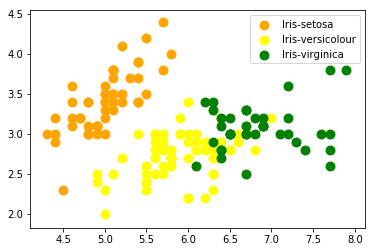

In [103]:
plt.scatter(iris_X[iris_Y1 == 0, 0], iris_X[iris_Y1 == 0, 1], s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[iris_Y1 == 1, 0], iris_X[iris_Y1 == 1, 1], s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[iris_Y1 == 2, 0], iris_X[iris_Y1 == 2, 1], s = 80, c = 'green', label = 'Iris-virginica')
plt.legend()

We observe that Iris-setosa has been correctly formed into a separate well-defined cluster, but the other two classes are not formed well.

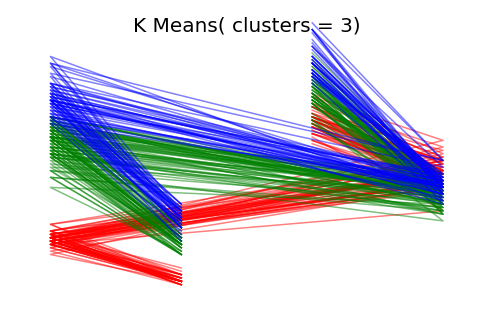

In [100]:
n_clusters = 3
plt.figure()
plt.axes([0, 0, 1, 1])
for l, c in zip(np.arange(n_clusters), 'rgbk'):
    plt.plot(x[model_kmeans.labels_ == l].T, c=c, alpha=.5)
    plt.axis('tight')
    plt.axis('off')
    plt.suptitle("K Means( clusters = %d)" % n_clusters, size=20)

## Clustering

In Machine Learning, unsupervised learning is a class of problems in which one seeks to determine how the data are organized. It is different from supervised learning and reinforcement learning in that learner is given only unlabeled examples.
< to change>

Clustering is a method of unsupervised learning for performing statistical analysis used in many fields.
Clustering is about dividing the data set into sub sets, or clusters, wherein the observations should be similar to those in the same cluster but differ greatly from the observations in other clusters. 

## Two common algorithms:
### 1. Hierarchical clustering
### 2. K-mean clustering

## 1. K-means clustering
K-means clustering is an algorithm to group your objects based on attributes into k number of groups and k > 0.
Grouping is done by minimizing the sum of squares of distances between data and the corresponding cluster centroid. 



## 2. Hierarchical clustering
Hierarchical  (aka agglomerative) clustering tries to link each data point by a distance measure, to its nearest neighbour, creating a cluster. Reiterating the algorithm using different linkage methods, the algorithm gathers all the available points into a rapidly diminishing number of clusters, until in the end all the points reunite into a single group.


## Linkage methods



### 1. Ward
This looks for spherical clusters, very cohesive inside and extremely differentiated from other groups. 
This finds clusters of similar size and works well with Euclidean distance.

### 2. Complete
This looks for most dissimilar data points and links clusters. Clusters created using this method comprises highly similar observations, making the clusters compact.

### 3. Average
This looks for centroids of data points, ignoring their boundaries and links clusters. 
These clusters are can be of different sizes and shapes making it attractive technique to be used in the field of biological sciences.

## Three distance metrics

### 1) Euclidean distance or l2

The Euclidean distance between points a and b is the length of the line segment connecting them .
$d_{Euc}{(a,b)}$ = $\sqrt{(\sum(a_i - b_i)}^2$

### 2) Manhattan or l1

The Manhattan distance between points is calculate by adding the absolute value of the difference between the dimensions.

$d_{Manhattan}{(a,b)}$ = ${\sum{|(a_i - b_i)|}}$

### 3) Cosine

Cosine distance is squared Euclidean distance with the data normalized to unit length.


In hierarchical clustering, we don't use a set number of clusters but rather we arrange the data in a hierarchy where on top of the hierarchy there is a single big cluster and at the bottom of the hierarchy we have as many clusters as many observations in the data set.

## Two common methods of hierarchical clustering algorithms:

### Agglomerative Hierarchical Clustering Algorithms

In this approach, we initially assign different clusters to each observation. Based on similarity we consolidate until we arrive at one single big cluster.

### Divisive Hierarchical Clustering Algorithm

In this approach, we initially assign a single cluster to  all the observations.The clusters are divided continuously until we have one cluster for each observation.

We will use Agglomerative Clustering method. 

We shall use a Dendrogram to decide the number of clusters required for the dataset.
A *Dendrogram* is a tree diagram illustrating the arrangement of clusters.

We will import the package AgglomerativeClustering for building an agglomerative clustering model. We shall import other required packages like pandas, matplotlib, numpy etc.
We shall import datasets for obtaining the iris dataset.
We shall import the package dendrogram which allows us to create dendrogram.

In [3]:
import pandas                  as     pd
import numpy                   as     np
from   sklearn.cluster         import AgglomerativeClustering, KMeans
import sklearn.datasets
from   scipy.cluster.hierarchy import dendrogram, linkage
from   matplotlib              import pyplot as plt
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

Load the iris data 

In [4]:
data     =  sklearn.datasets.load_iris()
x        =  pd.DataFrame(data.data, columns = list(data.feature_names))

Plot a dendrogram to help us in deciding the threshold values for the clustering algorithm. 
We decide the number of clusters by using this dendrogram.

Text(0, 0.5, 'Euclidean distance in the space with other variables')

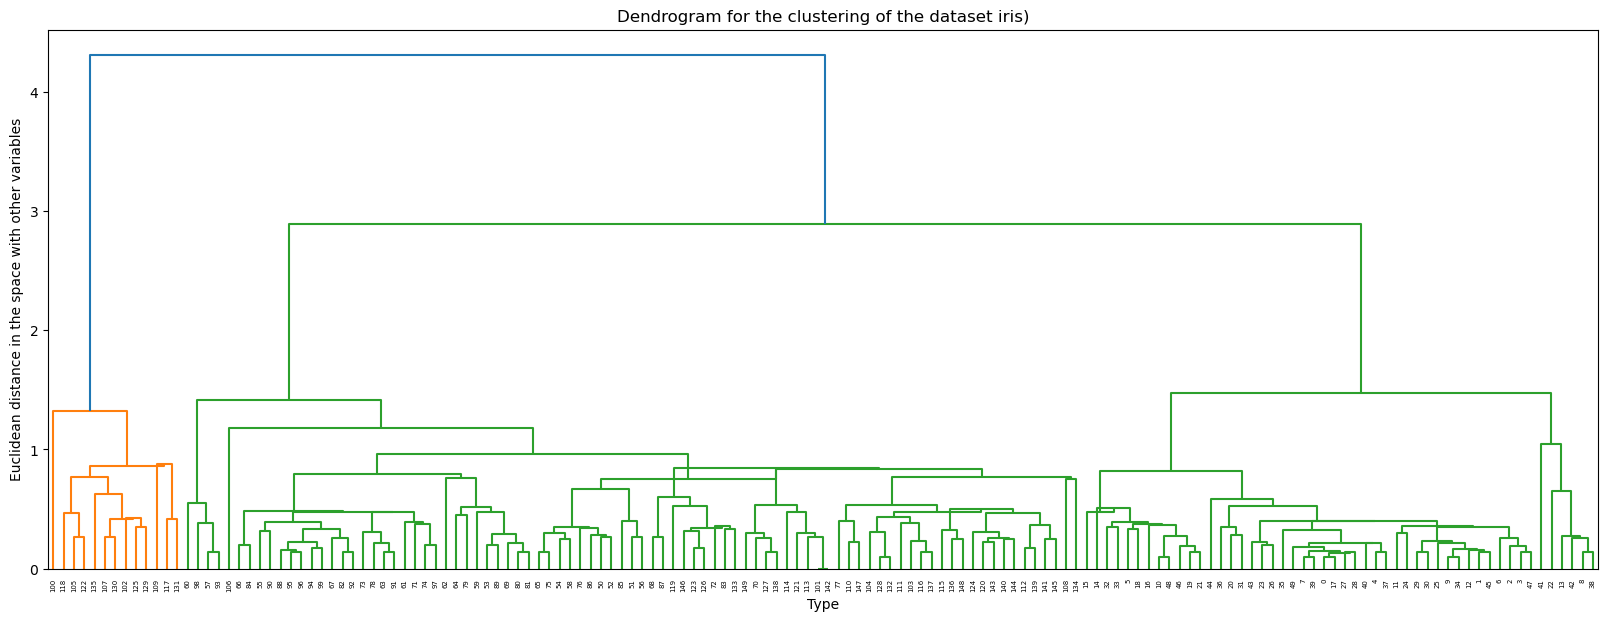

In [5]:
z   = linkage(x, method = 'median')

plt.figure(figsize=(20,7))

den = dendrogram(z)

plt.title('Dendrogram for the clustering of the dataset iris)')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')

## Based on the dissimilarity of the clusters, we arrive at three clusters. 

### Building an Agglomerative Clustering Model

#### 1. Initialize the model with number of clusters = 3, affinity = 'cosine' and linkage = 'complete'

In [25]:
cluster_H = AgglomerativeClustering(n_clusters = 3, affinity = 'cosine', linkage = 'complete')

#### 2. Fitting the model

After building the model, fit the iris data set by taking only independent variables.

In [26]:
model = cluster_H.fit(x)
print(model)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=3,
            pooling_func=<function mean at 0x0000021626981158>)


Retrieve the predicted labels from model.labels_ and compare with the target labels by using the crosstab(), function.

In [27]:
ms          = np.column_stack((data.target,model.labels_))
df          = pd.DataFrame(ms, columns = ['Actual', 'Clusters'])
pd.crosstab(df['Actual'], df['Clusters'], margins=True)

Clusters,0,1,2,All
Actual,,,,
0,50,0,0,50
1,0,50,0,50
2,0,24,26,50
All,50,74,26,150


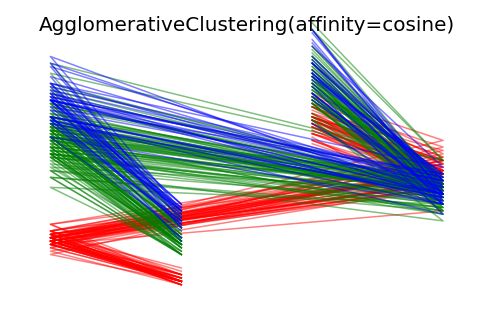

In [28]:
n_clusters = 3
plt.figure()
plt.axes([0, 0, 1, 1])
for l, c in zip(np.arange(n_clusters), 'rgbk'):
    plt.plot(x[model.labels_ == l].T, c=c, alpha=.5)
    plt.axis('tight')
    plt.axis('off')
    plt.suptitle("AgglomerativeClustering(affinity=%s)" % 'cosine', size=20)

In [106]:
df['Clusters']  = model.labels_.astype('int32')
df['Target']    = data.target.astype('int32')

In [107]:
pd.crosstab(df['Target'], df['Clusters'])

Clusters,0,1,2
Target,,,
0,50,0,0
1,0,50,0
2,0,24,26


In [108]:
iris_X  = x.values
iris_X  = np.array(iris_X)
iris_Y1 = df['Clusters']
iris_Y1 = np.array(iris_Y1)

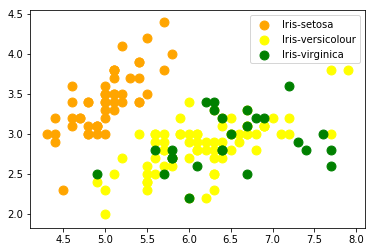

In [109]:
plt.scatter(iris_X[iris_Y1 == 0, 0], iris_X[iris_Y1 == 0, 1], s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[iris_Y1 == 1, 0], iris_X[iris_Y1 == 1, 1], s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[iris_Y1 == 2, 0], iris_X[iris_Y1 == 2, 1], s = 80, c = 'green', label = 'Iris-virginica')
plt.legend()

Here also we found that Iris-setosa has been clearly formed into separate cluster 
while the cluster, virginica overlap with Versicolor.

### K means

K-means is the most commonly used method for clustering.
It requires us to define the number of clusters. 


Decided the number of clusters, k
By performing Elbow analysis by running K-means for the value of k from 1 to 11, we find the optimum value of k.
for i in range(1, 11):

In [80]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Text(0,0.5,'WCSS')

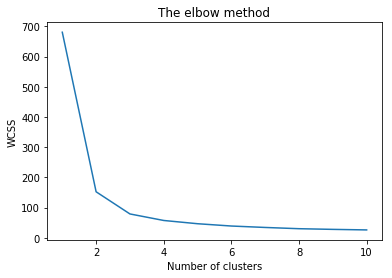

In [81]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Refer the above elbow graph. Observe the points where the drop falls and the line smoothens out. So k=3 because till k = 3, the decline is sharp. 

In [98]:
cluster_Kmeans = KMeans(n_clusters = 3, random_state = 25)
model_kmeans   = cluster_Kmeans.fit(x)
est_kmeans    = model_kmeans.labels_
est_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [99]:
df.drop(columns       = ['Clusters', 'Target'], inplace = True)
df['Clusters']        = est_kmeans
df['Target']          = data.target
pd.crosstab(df['Target'], df['Clusters'])

Clusters,0,1,2
Target,,,
0,50,0,0
1,0,48,2
2,0,14,36


The above table shows that we have classified 134 observations (50 + 48 + 36) out of 150 observations.

In [101]:
iris_X = x.values
iris_X = np.array(iris_X)
iris_Y = data.target
iris_Y = np.array(iris_Y)
iris_Y1 = pred_kmeans
iris_Y1 = np.array(iris_Y1)

### Visualize the clusters.

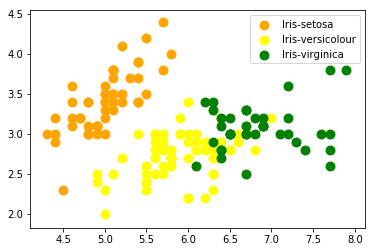

In [103]:
plt.scatter(iris_X[iris_Y1 == 0, 0], iris_X[iris_Y1 == 0, 1], s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[iris_Y1 == 1, 0], iris_X[iris_Y1 == 1, 1], s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[iris_Y1 == 2, 0], iris_X[iris_Y1 == 2, 1], s = 80, c = 'green', label = 'Iris-virginica')
plt.legend()

We observe that Iris-setosa has been correctly formed into a separate well-defined cluster, but the other two classes are not formed well.

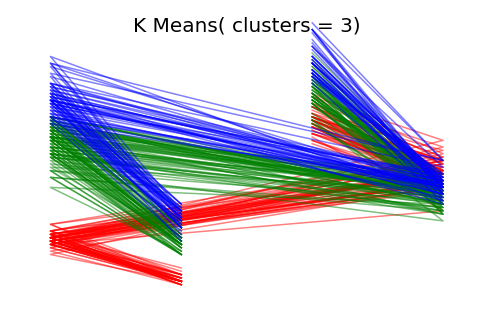

In [100]:
n_clusters = 3
plt.figure()
plt.axes([0, 0, 1, 1])
for l, c in zip(np.arange(n_clusters), 'rgbk'):
    plt.plot(x[model_kmeans.labels_ == l].T, c=c, alpha=.5)
    plt.axis('tight')
    plt.axis('off')
    plt.suptitle("K Means( clusters = %d)" % n_clusters, size=20)